# Red para COVID-19

# COVID-19 Mexico Predictioner

Esta es una red secuencial simple para tratar de predecir el dato de número de contagiados de COVID19 en Mexico y que se da a las 19:00 horas por parte del gobierno. Esperamos que esta red pueda ser de utilidad para quien desee probar nuevas ideas en la predicción. **Esta red utiliza los últimos N días de cada país antes del día a predecir, así como datos adicionales de superficie, poblacion, latitud, longitud, dia de deteccion del primer caso, PIB, gasto en salud, dia de inicio de la cuarentena.**

Creado por **Juan Felipe Huan Lew Yee**, **Isaí Neftalí Rodríguez Rojas** y **Jorge Martín del Campo Ramírez**.

## Para ejecutar la prediccion

1. Ejecutar processing.sh, este script descarga el archivo time_series_covid19_confirmed_global.csv con datos de contagiados por pais. Este archivo se actualiza en internet aproximadamente a las 5:30pm con datos del día anterior, revisar que esté actualizado a la fecha del día de la predicción.

```
chmod +x processing.sh
```

```
./processing.sh
```

Nota. Si en database_confirmed.csv no se ha actualizado el dato más reciente de México, significa que la base de datos en línea no se ha actualizado y puede ser necesario agregarlo manualmente en el archivo.

### Jupyter Notebook
2. Abrir jupyter notebook o ejecutar con python (se requiere keras, tensorflow, pandas y numpy instaldos).

```
jupyter notebook COVID-19.ipynb
```

3. Actualizar dias_a_usar, dia_a_predecir y dia_a_futuro. Como referencia, el 30 de marzo fue el día 33 de infeccion en Mexico, por lo que dia_a_predecir=33 y dias_a_usar=32.

4. Ejecutar todos los cuadros.

### Python
2. Ejecutar script con python (se requiere keras, tensorflow, pandas y numpy instaldos).

```
python COVID-19.py
```

3. Ingresar el número del día a predecir. Como referencia, el 30 de marzo fue el día 33 de infeccion en Mexico, por lo que dia_a_predecir=33 y dias_a_usar=32.

4. Ingresar el número de días previos a utilizar.

5. Ingresar el número de días de diferencia entre el último día a usar y día a predecir. Ejemplo, para predecir el día 50 con los días del 40 al 49 este dato valdrá 1, para predecir el día 50 con los datos del día 39 a 48 este dato valdrá 2.

6. Ingresar el número de repeticiones de la predicción. La red se entrenará este número de veces desde diferentes pesos de partida y se obtendrá un promedio de las predicciones.

Definimos el dia que queremos la prediccion

In [1]:
dia_a_predecir = 50 #De Mexico
dias_a_usar = 10
dias_a_futuro = 1 #Distancia entre el ultimo dia a usar y el dia a predecir 1 = Mañana, 2 = Pasado Mañana, etc

Definimos la lista de paises que analizaremos. (Hay más paises en la base de datos de John Hopkins)

In [2]:
country_namelist = ['Albania', 'Algeria', 'Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Congo (Brazzaville)', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Eritrea', 'Fiji', 'Finland', 'France', 'Germany', 'Ghana', 'Greece', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kuwait', 'Lebanon', 'Liberia', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malaysia', 'Montenegro', 'Morocco', 'Nepal', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'San Marino', 'Saudi Arabia', 'Serbia', 'Singapore', 'South Africa', 'Spain', 'Thailand', 'Tunisia', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'US', 'Venezuela', 'Zimbabwe', 'Libya', 'Botswana']
#country_namelist = ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Andorra', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Korea South', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Liberia', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malaysia', 'Maldives', 'Malta', 'Mauritania', 'Mauritius', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'San Marino', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Singapore', 'Slovakia', 'Slovenia', 'Somalia', 'South Africa', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Tanzania', 'Thailand', 'Togo', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uruguay', 'US', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Zambia', 'Zimbabwe', 'Dominica', 'Grenada', 'Mozambique', 'Syria', 'Timor-Leste', 'Belize', 'Laos', 'Libya', 'Guinea-Bissau', 'Mali', 'Saint Kitts and Nevis', 'Burma', 'Botswana', 'Burundi', 'Sierra Leone', 'Malawi']
#country_namelist = ["Afghanistan","Algeria","Australia","Austria","Bahrain","Belgium","Brazil","Cambodia","Canada","China","Croatia","Egypt","Finland","France","Georgia","Germany","Greece","India","Iran","Iraq","Israel","Italy","Japan","Korea South","Kuwait","Lebanon","Malaysia","Nepal","North Macedonia","Norway","Oman","Pakistan","Philippines","Romania","Russia","Singapore","Spain","Sri Lanka","Sweden","Switzerland","Thailand","United Arab Emirates","United Kingdom","US","Vietnam"]

Abrimos la base de datos de Superficie, Población y Continente por país, creamos un objeto para cada país. Posterirmente, abirmos la base de datos de John Hopkins y extraemos los datos de infectos por día y la latitud y longitud de cada país. También calculamos el día de inicio de la infección

In [3]:
db = open('database.csv','w')

print("Pais","Area","poblacion","Namerica","Samerica","Europe","Asia","Oceania","Africa","lat","long","Dia_inicio","PIB","Gasto_Salud","Cuarentena","Dia",end=',',file=db,sep=',')
for value in range(dias_a_usar):
    print(value+1,file=db,end = ',')
print("dia_a_predecir",file=db)

for country in country_namelist:
    f = open('propiedades_por_pais.csv')
    for line in f:
        if(country == line.replace('\n','').split(',')[0]):
            pais=line.replace('\n','').split(',')[0]
            superficie=line.replace('\n','').split(',')[1]
            poblacion=line.replace('\n','').split(',')[2]
            namerica=line.replace('\n','').split(',')[3]
            samerica=line.replace('\n','').split(',')[4]
            europe=line.replace('\n','').split(',')[5]
            asia=line.replace('\n','').split(',')[6]
            oceania=line.replace('\n','').split(',')[7]
            africa=line.replace('\n','').split(',')[8]
            pib=line.replace('\n','').split(',')[9]
            salud_pib=line.replace('\n','').split(',')[10]            
            cuarentena=line.replace('\n','').split(',')[11]            
    f.close()
    
    f = open('database_confirmed.csv')
    infected = []
    dia_inicio = 0
    for line in f:
        if(country == line.split(',')[1]):
            lat = float(line.split(',')[2])
            long = float(line.split(',')[3])
            country_data = []
            data = line.replace('\n','').split(',')[4:]
            for number in data:
                if(number != '0'):
                    infected.append(int(number))
                else:
                    dia_inicio += 1                    
    f.close()

    if(len(infected)<=dias_a_usar+dias_a_futuro):
#        print(pais,superficie,poblacion,namerica,samerica,europe,asia,oceania,africa,lat,long,pib,salud_pib,len(infected))
        continue
    for i in range(0,len(infected)-dias_a_usar-dias_a_futuro):
        print(pais,superficie,poblacion,namerica,samerica,europe,asia,oceania,africa,lat,long,dia_inicio,pib,salud_pib,cuarentena,i+dias_a_usar+1,end=',',file=db,sep=',')
        for j in range(dias_a_usar):
            print(infected[i+j],file=db,end = ',')
        print(infected[i+dias_a_usar+dias_a_futuro-1],file=db)
db.close()          

Importamos librerias

In [4]:
import numpy as np
import keras
import pandas as pd
pd.set_option('display.max_columns', 500)

Using TensorFlow backend.


Leamos la base de datos que acabamos de crear.

In [5]:
data = pd.read_csv("database.csv",sep=',') 

Imprimimos la base de datos

In [6]:
data

,Pais,Area,poblacion,Namerica,Samerica,Europe,Asia,Oceania,Africa,lat,long,Dia_inicio,PIB,Gasto_Salud,Cuarentena,Dia,1,2,3,4,5,6,7,8,9,10,dia_a_predecir
0,Albania,28748.0,2845955.0,0,0,1,0,0,0,41.1533,20.1683,47,15418.0,2.77,5.0,11,2,10,12,23,33,38,42,51,55,59,64
1,Albania,28748.0,2845955.0,0,0,1,0,0,0,41.1533,20.1683,47,15418.0,2.77,5.0,12,10,12,23,33,38,42,51,55,59,64,70
2,Albania,28748.0,2845955.0,0,0,1,0,0,0,41.1533,20.1683,47,15418.0,2.77,5.0,13,12,23,33,38,42,51,55,59,64,70,76
3,Albania,28748.0,2845955.0,0,0,1,0,0,0,41.1533,20.1683,47,15418.0,2.77,5.0,14,23,33,38,42,51,55,59,64,70,76,89
4,Albania,28748.0,2845955.0,0,0,1,0,0,0,41.1533,20.1683,47,15418.0,2.77,5.0,15,33,38,42,51,55,59,64,70,76,89,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,Botswana,581730.0,2338851.0,0,0,0,0,0,1,-22.3285,24.6849,68,18690.0,3.06,4.0,13,4,4,4,4,6,6,6,6,13,13,13
3228,Botswana,581730.0,2338851.0,0,0,0,0,0,1,-22.3285,24.6849,68,18690.0,3.06,4.0,14,4,4,4,6,6,6,6,13,13,13,13
3229,Botswana,581730.0,2338851.0,0,0,0,0,0,1,-22.3285,24.6849,68,18690.0,3.06,4.0,15,4,4,6,6,6,6,13,13,13,13,13
3230,Botswana,581730.0,2338851.0,0,0,0,0,0,1,-22.3285,24.6849,68,18690.0,3.06,4.0,16,4,6,6,6,6,13,13,13,13,13,13


Normalizamos algunas variables

In [7]:
from sklearn import preprocessing

print("Area")
area = data.Area #returns a numpy array
areamax=area.max()
areamin=area.min()
normalized_area=(area-area.min())/(area.max()-area.min())
print(areamin,areamax)
data['Area'] = normalized_area
print(areamin,areamax)

print("Poblacion")
poblacion = data.poblacion #returns a numpy array
poblacionmax=poblacion.max()
poblacionmin=poblacion.min()
normalized_poblacion=(poblacion-poblacion.min())/(poblacion.max()-poblacion.min())
print(poblacionmin,poblacionmax)
data['poblacion'] = normalized_poblacion
print(poblacionmin,poblacionmax)

print("lat")
lat = data.lat #returns a numpy array
latmax=lat.max()
latmin=lat.min()
normalized_lat=(lat-lat.min())/(lat.max()-lat.min())
print(latmin,latmax)
data['lat'] = normalized_lat
print(latmin,latmax)

print("long")
long = data.long #returns a numpy array
longmax=long.max()
longmin=long.min()
normalized_long=(long-long.min())/(long.max()-long.min())
print(longmin,longmax)
data['long'] = normalized_long
print(longmin,longmax)

print("Dia_inicio")
Dia_inicio = data.Dia_inicio #returns a numpy array
Dia_iniciomax=Dia_inicio.max()
Dia_iniciomin=Dia_inicio.min()
normalized_Dia_inicio=(Dia_inicio-Dia_inicio.min())/(Dia_inicio.max()-Dia_inicio.min())
print(Dia_iniciomin,Dia_iniciomax)
data['Dia_inicio'] = normalized_Dia_inicio
print(Dia_iniciomin,Dia_iniciomax)

print("PIB")
PIB = data.PIB #returns a numpy array
PIBmax=PIB.max()
PIBmin=PIB.min()
normalized_PIB=(PIB-PIB.min())/(PIB.max()-PIB.min())
print(PIBmin,PIBmax)
data['PIB'] = normalized_PIB
print(PIBmin,PIBmax)

print("Gasto_Salud")
Gasto_Salud = data.Gasto_Salud #returns a numpy array
Gasto_Saludmax=Gasto_Salud.max()
Gasto_Saludmin=Gasto_Salud.min()
normalized_Gasto_Salud=(Gasto_Salud-Gasto_Salud.min())/(Gasto_Salud.max()-Gasto_Salud.min())
print(Gasto_Saludmin,Gasto_Saludmax)
data['Gasto_Salud'] = normalized_Gasto_Salud
print(Gasto_Saludmin,Gasto_Saludmax)

print("Cuarentena")
Cuarentena = data.Cuarentena #returns a numpy array
Cuarentenamax=Cuarentena.max()
Cuarentenamin=Cuarentena.min()
normalized_Cuarentena=(Cuarentena-Cuarentena.min())/(Cuarentena.max()-Cuarentena.min())
print(Cuarentenamin,Cuarentenamax)
data['Cuarentena'] = normalized_Cuarentena
print(Cuarentenamin,Cuarentenamax)

print("Dia")
Dia = data.Dia #returns a numpy array
Diamax=Dia.max()
Diamin=Dia.min()
normalized_Dia=(Dia-Dia.min())/(Dia.max()-Dia.min())
print(Diamin,Diamax)
data['Dia'] = normalized_Dia
print(Diamin,Diamax)

infectedmin = 1
infectedmax = 1

for i in range(dias_a_usar):
    infected = data[str(i+1)]
    infectedmax = max(infectedmax,np.amax(infected))

for i in range(dias_a_usar):
    infected = data[str(i+1)]
    normalize_infected = (infected-infectedmin)/(infectedmax-infectedmin)
    data[str(i+1)] = normalize_infected

Area
61.0 17098246.0
61.0 17098246.0
Poblacion
33574.0 1360537008.0
33574.0 1360537008.0
lat
-40.9006 64.0
-40.9006 64.0
long
-95.7129 178.065
-95.7129 178.065
Dia_inicio
0 68
0 68
PIB
1591.0 21439453.0
1591.0 21439453.0
Gasto_Salud
0.47 14.32
0.47 14.32
Cuarentena
1.0 77.0
1.0 77.0
Dia
11 85
11 85


Imprimimos la base de datos normalizada

In [8]:
data

,Pais,Area,poblacion,Namerica,Samerica,Europe,Asia,Oceania,Africa,lat,long,Dia_inicio,PIB,Gasto_Salud,Cuarentena,Dia,1,2,3,4,5,6,7,8,9,10,dia_a_predecir
0,Albania,0.001678,0.002067,0,0,1,0,0,0,0.782206,0.423267,0.691176,0.000645,0.166065,0.052632,0.000000,0.000002,0.000015,0.000018,0.000036,0.000053,0.000061,0.000067,0.000082,0.000089,0.000095,64
1,Albania,0.001678,0.002067,0,0,1,0,0,0,0.782206,0.423267,0.691176,0.000645,0.166065,0.052632,0.013514,0.000015,0.000018,0.000036,0.000053,0.000061,0.000067,0.000082,0.000089,0.000095,0.000104,70
2,Albania,0.001678,0.002067,0,0,1,0,0,0,0.782206,0.423267,0.691176,0.000645,0.166065,0.052632,0.027027,0.000018,0.000036,0.000053,0.000061,0.000067,0.000082,0.000089,0.000095,0.000104,0.000114,76
3,Albania,0.001678,0.002067,0,0,1,0,0,0,0.782206,0.423267,0.691176,0.000645,0.166065,0.052632,0.040541,0.000036,0.000053,0.000061,0.000067,0.000082,0.000089,0.000095,0.000104,0.000114,0.000123,89
4,Albania,0.001678,0.002067,0,0,1,0,0,0,0.782206,0.423267,0.691176,0.000645,0.166065,0.052632,0.054054,0.000053,0.000061,0.000067,0.000082,0.000089,0.000095,0.000104,0.000114,0.000123,0.000145,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,Botswana,0.034019,0.001694,0,0,0,0,0,1,0.177045,0.439764,1.000000,0.000798,0.187004,0.039474,0.027027,0.000005,0.000005,0.000005,0.000005,0.000008,0.000008,0.000008,0.000008,0.000020,0.000020,13
3228,Botswana,0.034019,0.001694,0,0,0,0,0,1,0.177045,0.439764,1.000000,0.000798,0.187004,0.039474,0.040541,0.000005,0.000005,0.000005,0.000008,0.000008,0.000008,0.000008,0.000020,0.000020,0.000020,13
3229,Botswana,0.034019,0.001694,0,0,0,0,0,1,0.177045,0.439764,1.000000,0.000798,0.187004,0.039474,0.054054,0.000005,0.000005,0.000008,0.000008,0.000008,0.000008,0.000020,0.000020,0.000020,0.000020,13
3230,Botswana,0.034019,0.001694,0,0,0,0,0,1,0.177045,0.439764,1.000000,0.000798,0.187004,0.039474,0.067568,0.000005,0.000008,0.000008,0.000008,0.000008,0.000020,0.000020,0.000020,0.000020,0.000020,13


Creamos un conjunto X y un conjunto Y y dividimos train y test

In [9]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame()
X['Area'] = data['Area']
X['poblacion'] = data['poblacion']
#X['Namerica'] = data['Namerica']
#X['Samerica'] = data['Samerica']
#X['Europe'] = data['Europe']
#X['Asia'] = data['Asia']
#X['Oceania'] = data['Oceania']
#X['Africa'] = data['Africa']
X['lat'] = data['lat']
X['long'] = data['long']
X['Dia_inicio'] = data['Dia_inicio']
X['PIB'] = data['PIB']
X['Gasto_Salud'] = data['Gasto_Salud']
X['Cuarentena'] = data['Cuarentena']
X['Dia'] = data['Dia']
for i in range(1,dias_a_usar+1):
    X[str(i)] = data[str(i)]
Y = pd.DataFrame()
Y["dia_a_predecir"] = data["dia_a_predecir"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1939, 19) (1939, 1)
(1293, 19) (1293, 1)


Creamos la red neuronal

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

model = Sequential()
model.add(Dense(32, input_dim=dias_a_usar+9, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

Compilamos la red

In [11]:
model.compile(loss='MAPE', optimizer='adam')

Entrenamos la red

In [12]:
history = model.fit(X_train, y_train, epochs=500,validation_data=(X_test,y_test))

Train on 1939 samples, validate on 1293 samples
Epoch 1/500
1939/1939 [==============================] - 2s 863us/step - loss: 96.5518 - val_loss: 93.9743
Epoch 2/500
1939/1939 [==============================] - 0s 205us/step - loss: 92.6862 - val_loss: 92.6413
Epoch 3/500
1939/1939 [==============================] - 0s 201us/step - loss: 91.0107 - val_loss: 90.4378
Epoch 4/500
1939/1939 [==============================] - 1s 265us/step - loss: 89.5691 - val_loss: 89.4894
Epoch 5/500
1939/1939 [==============================] - 1s 278us/step - loss: 88.5542 - val_loss: 88.3815
Epoch 6/500
1939/1939 [==============================] - 1s 326us/step - loss: 87.9774 - val_loss: 87.5795
Epoch 7/500
1939/1939 [==============================] - 0s 211us/step - loss: 86.9439 - val_loss: 86.9451
Epoch 8/500
1939/1939 [==============================] - 0s 191us/step - loss: 86.5337 - val_loss: 86.9904
Epoch 9/500
1939/1939 [==============================] - 1s 324us/step - loss: 86.0372 - val_los

1939/1939 [==============================] - 0s 173us/step - loss: 24.2348 - val_loss: 28.1208
Epoch 77/500
1939/1939 [==============================] - 0s 183us/step - loss: 22.2497 - val_loss: 26.1727
Epoch 78/500
1939/1939 [==============================] - 0s 145us/step - loss: 22.8179 - val_loss: 27.2676
Epoch 79/500
1939/1939 [==============================] - 1s 472us/step - loss: 22.2949 - val_loss: 27.0201
Epoch 80/500
1939/1939 [==============================] - 0s 202us/step - loss: 21.6174 - val_loss: 26.2486
Epoch 81/500
1939/1939 [==============================] - 0s 188us/step - loss: 23.1365 - val_loss: 27.4976
Epoch 82/500
1939/1939 [==============================] - 0s 203us/step - loss: 21.9063 - val_loss: 33.0537
Epoch 83/500
1939/1939 [==============================] - 0s 181us/step - loss: 21.8259 - val_loss: 25.0544
Epoch 84/500
1939/1939 [==============================] - 0s 177us/step - loss: 21.6738 - val_loss: 27.2855
Epoch 85/500
1939/1939 [=================

1939/1939 [==============================] - 0s 197us/step - loss: 16.2490 - val_loss: 20.0483
Epoch 152/500
1939/1939 [==============================] - 0s 218us/step - loss: 17.8282 - val_loss: 21.9071
Epoch 153/500
1939/1939 [==============================] - 0s 210us/step - loss: 15.9085 - val_loss: 20.5878
Epoch 154/500
1939/1939 [==============================] - 0s 185us/step - loss: 16.0682 - val_loss: 22.7858
Epoch 155/500
1939/1939 [==============================] - 0s 167us/step - loss: 17.6719 - val_loss: 20.0556
Epoch 156/500
1939/1939 [==============================] - 0s 177us/step - loss: 15.8193 - val_loss: 19.5633
Epoch 157/500
1939/1939 [==============================] - 0s 206us/step - loss: 15.9731 - val_loss: 22.0969
Epoch 158/500
1939/1939 [==============================] - 0s 222us/step - loss: 16.2460 - val_loss: 19.9057
Epoch 159/500
1939/1939 [==============================] - 0s 207us/step - loss: 15.2495 - val_loss: 23.9946
Epoch 160/500
1939/1939 [========

1939/1939 [==============================] - 0s 194us/step - loss: 13.1267 - val_loss: 17.5191
Epoch 227/500
1939/1939 [==============================] - 0s 205us/step - loss: 12.4271 - val_loss: 17.1520
Epoch 228/500
1939/1939 [==============================] - 0s 240us/step - loss: 12.5540 - val_loss: 16.3338
Epoch 229/500
1939/1939 [==============================] - 0s 195us/step - loss: 11.8279 - val_loss: 16.6055
Epoch 230/500
1939/1939 [==============================] - 0s 168us/step - loss: 13.0490 - val_loss: 17.2901
Epoch 231/500
1939/1939 [==============================] - 0s 210us/step - loss: 12.5249 - val_loss: 15.8522
Epoch 232/500
1939/1939 [==============================] - 0s 193us/step - loss: 13.8244 - val_loss: 16.9165
Epoch 233/500
1939/1939 [==============================] - 0s 198us/step - loss: 14.3581 - val_loss: 16.7563
Epoch 234/500
1939/1939 [==============================] - 0s 185us/step - loss: 11.9016 - val_loss: 16.1324
Epoch 235/500
1939/1939 [========

1939/1939 [==============================] - 0s 214us/step - loss: 10.7611 - val_loss: 15.7187
Epoch 302/500
1939/1939 [==============================] - 0s 191us/step - loss: 11.1849 - val_loss: 15.6517
Epoch 303/500
1939/1939 [==============================] - 0s 187us/step - loss: 10.4596 - val_loss: 15.5302
Epoch 304/500
1939/1939 [==============================] - 0s 190us/step - loss: 11.3835 - val_loss: 15.1731
Epoch 305/500
1939/1939 [==============================] - 0s 218us/step - loss: 12.0321 - val_loss: 15.8874
Epoch 306/500
1939/1939 [==============================] - 0s 179us/step - loss: 10.6303 - val_loss: 15.1109
Epoch 307/500
1939/1939 [==============================] - 0s 205us/step - loss: 11.6075 - val_loss: 15.7673
Epoch 308/500
1939/1939 [==============================] - 0s 203us/step - loss: 13.6349 - val_loss: 16.2008
Epoch 309/500
1939/1939 [==============================] - 0s 188us/step - loss: 10.8232 - val_loss: 15.9197
Epoch 310/500
1939/1939 [========

1939/1939 [==============================] - 0s 229us/step - loss: 10.6330 - val_loss: 19.1104
Epoch 377/500
1939/1939 [==============================] - 0s 214us/step - loss: 9.5759 - val_loss: 16.0844
Epoch 378/500
1939/1939 [==============================] - 0s 189us/step - loss: 9.1143 - val_loss: 14.0586
Epoch 379/500
1939/1939 [==============================] - 0s 211us/step - loss: 11.4111 - val_loss: 14.2867
Epoch 380/500
1939/1939 [==============================] - 0s 212us/step - loss: 9.2142 - val_loss: 14.7504
Epoch 381/500
1939/1939 [==============================] - 0s 251us/step - loss: 9.5948 - val_loss: 14.2891
Epoch 382/500
1939/1939 [==============================] - 0s 203us/step - loss: 9.4714 - val_loss: 13.7491
Epoch 383/500
1939/1939 [==============================] - 0s 200us/step - loss: 11.5965 - val_loss: 17.0099
Epoch 384/500
1939/1939 [==============================] - 0s 196us/step - loss: 11.2528 - val_loss: 14.0198
Epoch 385/500
1939/1939 [=============

1939/1939 [==============================] - 0s 209us/step - loss: 9.0176 - val_loss: 14.4831
Epoch 452/500
1939/1939 [==============================] - 0s 177us/step - loss: 9.5105 - val_loss: 13.1323
Epoch 453/500
1939/1939 [==============================] - 0s 183us/step - loss: 9.1506 - val_loss: 16.8903
Epoch 454/500
1939/1939 [==============================] - 0s 192us/step - loss: 8.4209 - val_loss: 14.2775
Epoch 455/500
1939/1939 [==============================] - 0s 224us/step - loss: 8.6947 - val_loss: 12.8409
Epoch 456/500
1939/1939 [==============================] - 0s 218us/step - loss: 8.8567 - val_loss: 13.7284
Epoch 457/500
1939/1939 [==============================] - 0s 174us/step - loss: 8.1970 - val_loss: 14.0758
Epoch 458/500
1939/1939 [==============================] - 0s 179us/step - loss: 9.9349 - val_loss: 14.2523
Epoch 459/500
1939/1939 [==============================] - 0s 180us/step - loss: 9.7170 - val_loss: 14.0937
Epoch 460/500
1939/1939 [=================

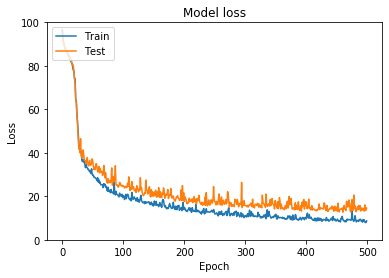

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0,100)
plt.show()

Realizamos predicciones del test

In [14]:
model.predict(X_test)

array([[1531.9333  ],
       [ 350.09756 ],
       [8617.718   ],
       ...,
       [1554.4008  ],
       [  12.093544],
       [  28.073973]], dtype=float32)

Comprobamos

In [15]:
y_test

,dia_a_predecir
2601,1299
1629,299
1922,8647
2780,400
1931,17953
...,...
469,502
3210,17
2324,1389
759,12


# Predicción

In [16]:
country_prediction_namelist = ['Mexico']

In [17]:
db = open('database_prediction.csv','w')

print("Pais","Area","poblacion","Namerica","Samerica","Europe","Asia","Oceania","Africa","lat","long","Dia_inicio","PIB","Gasto_Salud","Cuarentena","Dia",end=',',file=db,sep=',')
for value in range(dias_a_usar):
    print(value+1,file=db,end = ',')
print("dia_a_predecir",file=db)

for country in country_prediction_namelist:
    f = open('propiedades_por_pais.csv')
    for line in f:
        if(country == line.replace('\n','').split(',')[0]):
            pais=line.replace('\n','').split(',')[0]
            superficie=line.replace('\n','').split(',')[1]
            poblacion=line.replace('\n','').split(',')[2]
            namerica=line.replace('\n','').split(',')[3]
            samerica=line.replace('\n','').split(',')[4]
            europe=line.replace('\n','').split(',')[5]
            asia=line.replace('\n','').split(',')[6]
            oceania=line.replace('\n','').split(',')[7]
            africa=line.replace('\n','').split(',')[8]
            pib=line.replace('\n','').split(',')[9]
            salud_pib=line.replace('\n','').split(',')[10]            
            cuarentena=line.replace('\n','').split(',')[11]            
    f.close()
    
    f = open('database_confirmed.csv')
    infected = []
    dia_inicio = 0
    for line in f:
        if(country == line.split(',')[1]):
            lat = float(line.split(',')[2])
            long = float(line.split(',')[3])
            country_data = []
            data = line.replace('\n','').split(',')[4:]
            for number in data:
                if(number != '0'):
                    infected.append(int(number))
                else:
                    dia_inicio += 1                    
    f.close()

    if(len(infected)<dias_a_usar):
        continue    
    print(pais,superficie,poblacion,namerica,samerica,europe,asia,oceania,africa,lat,long,dia_inicio,pib,salud_pib,cuarentena,dia_a_predecir,end=',',file=db,sep=',')
    for value in infected[dia_a_predecir-dias_a_usar-dias_a_futuro:dia_a_predecir-dias_a_futuro]:
        print(value,file=db,end = ',')
    if(len(infected)>=dia_a_predecir):
        print(infected[dia_a_predecir-1],file=db)
    else:
        print(-1,file=db)

db.close()          

In [18]:
data_prediction = pd.read_csv("database_prediction.csv",sep=',') 

In [19]:
data_prediction

,Pais,Area,poblacion,Namerica,Samerica,Europe,Asia,Oceania,Africa,lat,long,Dia_inicio,PIB,Gasto_Salud,Cuarentena,Dia,1,2,3,4,5,6,7,8,9,10,dia_a_predecir
0,Mexico,1964375.0,126577691.0,1,0,0,0,0,0,23.6345,-102.5528,37,1274175.0,2.81,25.0,50,2439,2785,3181,3441,3844,4219,4661,5014,5399,5847,-1


In [20]:
area_prediction = data_prediction.Area #returns a numpy array
#normalized_area=(area-area.mean())/area.std()
normalized_area_prediction=(area_prediction-areamin)/(areamax-areamin)
data_prediction['Area'] = normalized_area_prediction

poblacion_prediction = data_prediction.poblacion #returns a numpy array
#normalized_poblacion=(poblacion-poblacion.mean())/poblacion.std()
normalized_poblacion_prediction=(poblacion_prediction-poblacionmin)/(poblacionmax-poblacionmin)
data_prediction['poblacion'] = normalized_poblacion_prediction

lat_prediction = data_prediction.lat #returns a numpy array
normalized_lat_prediction=(lat_prediction-latmin)/(latmax-latmin)
data_prediction['lat'] = normalized_lat_prediction

long_prediction = data_prediction.long #returns a numpy array
normalized_long_prediction=(long_prediction-longmin)/(longmax-longmin)
data_prediction['long'] = normalized_long_prediction

Dia_inicio_prediction = data_prediction.Dia_inicio #returns a numpy array
normalized_Dia_inicio_prediction=(Dia_inicio_prediction-Dia_iniciomin)/(Dia_iniciomax-Dia_iniciomin)
data_prediction['Dia_inicio'] = normalized_Dia_inicio_prediction

PIB_prediction = data_prediction.PIB #returns a numpy array
normalized_PIB_prediction=(PIB_prediction-PIBmin)/(PIBmax-PIBmin)
data_prediction['PIB'] = normalized_PIB_prediction

Gasto_Salud_prediction = data_prediction.Gasto_Salud #returns a numpy array
normalized_Gasto_Salud_prediction=(Gasto_Salud_prediction-Gasto_Saludmin)/(Gasto_Saludmax-Gasto_Saludmin)
data_prediction['Gasto_Salud'] = normalized_Gasto_Salud_prediction

Cuarentena_prediction = data_prediction.Cuarentena #returns a numpy array
normalized_Cuarentena_prediction=(Cuarentena_prediction-Cuarentenamin)/(Cuarentenamax-Cuarentenamin)
data_prediction['Cuarentena'] = normalized_Cuarentena_prediction

Dia_prediction = data_prediction.Dia #returns a numpy array
normalized_Dia_prediction=(Dia_prediction-Diamin)/(Diamax-Diamin)
data_prediction['Dia'] = normalized_Dia_prediction

for i in range(dias_a_usar):
    infected = data_prediction[str(i+1)]
    normalize_infected = (infected-infectedmin)/(infectedmax-infectedmin)
    data_prediction[str(i+1)] = normalize_infected

In [21]:
data_prediction

,Pais,Area,poblacion,Namerica,Samerica,Europe,Asia,Oceania,Africa,lat,long,Dia_inicio,PIB,Gasto_Salud,Cuarentena,Dia,1,2,3,4,5,6,7,8,9,10,dia_a_predecir
0,Mexico,0.114884,0.093013,1,0,0,0,0,0,0.615202,-0.024983,0.544118,0.059362,0.168953,0.315789,0.527027,0.004012,0.004581,0.005233,0.005661,0.006324,0.006941,0.007669,0.00825,0.008883,0.00962,-1


In [22]:
from sklearn.model_selection import train_test_split
X_prediction = pd.DataFrame()
X_prediction['Area'] = data_prediction['Area']
X_prediction['poblacion'] = data_prediction['poblacion']
#X_prediction['Namerica'] = data_prediction['Namerica']
#X_prediction['Samerica'] = data_prediction['Samerica']
#X_prediction['Europe'] = data_prediction['Europe']
#X_prediction['Asia'] = data_prediction['Asia']
#X_prediction['Oceania'] = data_prediction['Oceania']
#X_prediction['Africa'] = data_prediction['Africa']
X_prediction['lat'] = data_prediction['lat']
X_prediction['long'] = data_prediction['long']
X_prediction['Dia_inicio'] = data_prediction['Dia_inicio']
X_prediction['PIB'] = data_prediction['PIB']
X_prediction['Gasto_Salud'] = data_prediction['Gasto_Salud']
X_prediction['Cuarentena'] = data_prediction['Cuarentena']
X_prediction['Dia'] = data_prediction['Dia']
for i in range(1,dias_a_usar+1):
    X_prediction[str(i)] = data_prediction[str(i)]
Y_prediction = pd.DataFrame()
Y_prediction["dia_a_predecir"] = data_prediction["dia_a_predecir"]
print(X_prediction.shape, Y_prediction.shape)

(1, 19) (1, 1)


In [23]:
model.predict(X_prediction)

array([[7576.6104]], dtype=float32)

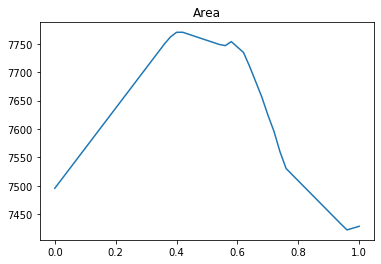

In [24]:
pred_area = []
x = np.linspace(0,1.0,51)
for i in x:
    X_prediction = pd.DataFrame()
    X_prediction['Area'] = np.asarray([i])#data_prediction['Area']
    X_prediction['poblacion'] = data_prediction['poblacion']  
    #X_prediction['Namerica'] = data_prediction['Namerica']
    #X_prediction['Samerica'] = data_prediction['Samerica']
    #X_prediction['Europe'] = data_prediction['Europe']
    #X_prediction['Asia'] = data_prediction['Asia']
    #X_prediction['Oceania'] = data_prediction['Oceania']
    #X_prediction['Africa'] = data_prediction['Africa']
    X_prediction['lat'] = data_prediction['lat']    
    X_prediction['long'] = data_prediction['long']
    X_prediction['Dia_inicio'] = data_prediction['Dia_inicio']
    X_prediction['PIB'] = data_prediction['PIB']
    X_prediction['Gasto_Salud'] = data_prediction['Gasto_Salud']
    X_prediction['Cuarentena'] = data_prediction['Cuarentena']
    X_prediction['Dia'] = data_prediction['Dia']
    for i in range(1,dias_a_usar+1):
        X_prediction[str(i)] = data_prediction[str(i)]
    Y_prediction = pd.DataFrame()
    Y_prediction["dia_a_predecir"] = data_prediction["dia_a_predecir"]
    pred_area.append(model.predict(X_prediction)[0])
plt.title("Area")
plt.plot(x,pred_area)

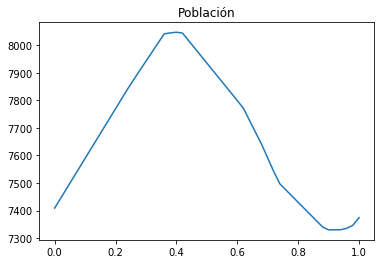

In [25]:
pred_poblacion = []
x = np.linspace(0,1.0,51)
for i in x:
    X_prediction = pd.DataFrame()
    X_prediction['Area'] = data_prediction['Area']
    X_prediction['poblacion'] = np.asarray([i])#data_prediction['poblacion']  
    #X_prediction['Namerica'] = data_prediction['Namerica']
    #X_prediction['Samerica'] = data_prediction['Samerica']
    #X_prediction['Europe'] = data_prediction['Europe']
    #X_prediction['Asia'] = data_prediction['Asia']
    #X_prediction['Oceania'] = data_prediction['Oceania']
    #X_prediction['Africa'] = data_prediction['Africa']
    X_prediction['lat'] = data_prediction['lat']    
    X_prediction['long'] = data_prediction['long']
    X_prediction['Dia_inicio'] = data_prediction['Dia_inicio']
    X_prediction['PIB'] = data_prediction['PIB']
    X_prediction['Gasto_Salud'] = data_prediction['Gasto_Salud']
    X_prediction['Cuarentena'] = data_prediction['Cuarentena']
    X_prediction['Dia'] = data_prediction['Dia']
    for i in range(1,dias_a_usar+1):
        X_prediction[str(i)] = data_prediction[str(i)]
    Y_prediction = pd.DataFrame()
    Y_prediction["dia_a_predecir"] = data_prediction["dia_a_predecir"]
    pred_poblacion.append(model.predict(X_prediction)[0])
plt.title("Población")
plt.plot(x,pred_poblacion)

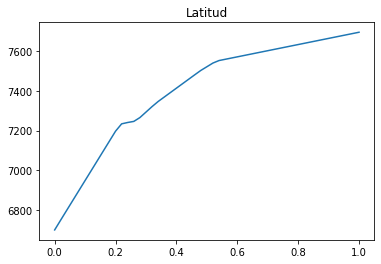

In [26]:
pred_latitud = []
x = np.linspace(0,1.0,51)
for i in x:
    X_prediction = pd.DataFrame()
    X_prediction['Area'] = data_prediction['Area']
    X_prediction['poblacion'] = data_prediction['poblacion']  
    #X_prediction['Namerica'] = data_prediction['Namerica']
    #X_prediction['Samerica'] = data_prediction['Samerica']
    #X_prediction['Europe'] = data_prediction['Europe']
    #X_prediction['Asia'] = data_prediction['Asia']
    #X_prediction['Oceania'] = data_prediction['Oceania']
    #X_prediction['Africa'] = data_prediction['Africa']
    X_prediction['lat'] = np.asarray([i])#data_prediction['lat']    
    X_prediction['long'] = data_prediction['long']
    X_prediction['Dia_inicio'] = data_prediction['Dia_inicio']
    X_prediction['PIB'] = data_prediction['PIB']
    X_prediction['Gasto_Salud'] = data_prediction['Gasto_Salud']
    X_prediction['Cuarentena'] = data_prediction['Cuarentena']
    X_prediction['Dia'] = data_prediction['Dia']
    for i in range(1,dias_a_usar+1):
        X_prediction[str(i)] = data_prediction[str(i)]
    Y_prediction = pd.DataFrame()
    Y_prediction["dia_a_predecir"] = data_prediction["dia_a_predecir"]
    pred_latitud.append(model.predict(X_prediction)[0])
plt.title("Latitud")
plt.plot(x,pred_latitud)

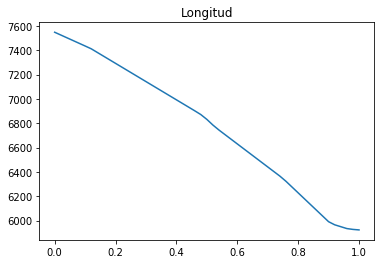

In [27]:
pred_longitud = []
x = np.linspace(0,1.0,51)
for i in x:
    X_prediction = pd.DataFrame()
    X_prediction['Area'] = data_prediction['Area']
    X_prediction['poblacion'] = data_prediction['poblacion']  
    #X_prediction['Namerica'] = data_prediction['Namerica']
    #X_prediction['Samerica'] = data_prediction['Samerica']
    #X_prediction['Europe'] = data_prediction['Europe']
    #X_prediction['Asia'] = data_prediction['Asia']
    #X_prediction['Oceania'] = data_prediction['Oceania']
    #X_prediction['Africa'] = data_prediction['Africa']
    X_prediction['lat'] = data_prediction['lat']    
    X_prediction['long'] = np.asarray([i])#data_prediction['long']
    X_prediction['Dia_inicio'] = data_prediction['Dia_inicio']
    X_prediction['PIB'] = data_prediction['PIB']
    X_prediction['Gasto_Salud'] = data_prediction['Gasto_Salud']
    X_prediction['Cuarentena'] = data_prediction['Cuarentena']
    X_prediction['Dia'] = data_prediction['Dia']
    for i in range(1,dias_a_usar+1):
        X_prediction[str(i)] = data_prediction[str(i)]
    Y_prediction = pd.DataFrame()
    Y_prediction["dia_a_predecir"] = data_prediction["dia_a_predecir"]
    pred_longitud.append(model.predict(X_prediction)[0])
plt.title("Longitud")
plt.plot(x,pred_longitud)

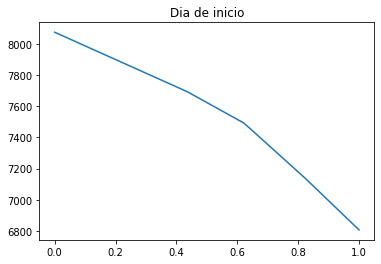

In [28]:
pred_dia_de_inicio = []
x = np.linspace(0,1.0,51)
for i in x:
    X_prediction = pd.DataFrame()
    X_prediction['Area'] = data_prediction['Area']
    X_prediction['poblacion'] = data_prediction['poblacion']  
    #X_prediction['Namerica'] = data_prediction['Namerica']
    #X_prediction['Samerica'] = data_prediction['Samerica']
    #X_prediction['Europe'] = data_prediction['Europe']
    #X_prediction['Asia'] = data_prediction['Asia']
    #X_prediction['Oceania'] = data_prediction['Oceania']
    #X_prediction['Africa'] = data_prediction['Africa']
    X_prediction['lat'] = data_prediction['lat']    
    X_prediction['long'] = data_prediction['long']
    X_prediction['Dia_inicio'] = np.asarray([i])#data_prediction['Dia_inicio']
    X_prediction['PIB'] = data_prediction['PIB']
    X_prediction['Gasto_Salud'] = data_prediction['Gasto_Salud']
    X_prediction['Cuarentena'] = data_prediction['Cuarentena']
    X_prediction['Dia'] = data_prediction['Dia']
    for i in range(1,dias_a_usar+1):
        X_prediction[str(i)] = data_prediction[str(i)]
    Y_prediction = pd.DataFrame()
    Y_prediction["dia_a_predecir"] = data_prediction["dia_a_predecir"]
    pred_dia_de_inicio.append(model.predict(X_prediction)[0])
plt.title("Dia de inicio")
plt.plot(x,pred_dia_de_inicio)

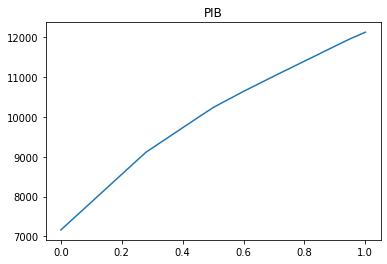

In [29]:
pred_pib = []
x = np.linspace(0,1.0,51)
for i in x:
    X_prediction = pd.DataFrame()
    X_prediction['Area'] = data_prediction['Area']
    X_prediction['poblacion'] = data_prediction['poblacion']  
    #X_prediction['Namerica'] = data_prediction['Namerica']
    #X_prediction['Samerica'] = data_prediction['Samerica']
    #X_prediction['Europe'] = data_prediction['Europe']
    #X_prediction['Asia'] = data_prediction['Asia']
    #X_prediction['Oceania'] = data_prediction['Oceania']
    #X_prediction['Africa'] = data_prediction['Africa']
    X_prediction['lat'] = data_prediction['lat']    
    X_prediction['long'] = data_prediction['long']
    X_prediction['Dia_inicio'] = data_prediction['Dia_inicio']
    X_prediction['PIB'] = np.asarray([i])#data_prediction['PIB']
    X_prediction['Gasto_Salud'] = data_prediction['Gasto_Salud']
    X_prediction['Cuarentena'] = data_prediction['Cuarentena']
    X_prediction['Dia'] = data_prediction['Dia']
    for i in range(1,dias_a_usar+1):
        X_prediction[str(i)] = data_prediction[str(i)]
    Y_prediction = pd.DataFrame()
    Y_prediction["dia_a_predecir"] = data_prediction["dia_a_predecir"]
    pred_pib.append(model.predict(X_prediction)[0])
plt.title("PIB")
plt.plot(x,pred_pib)

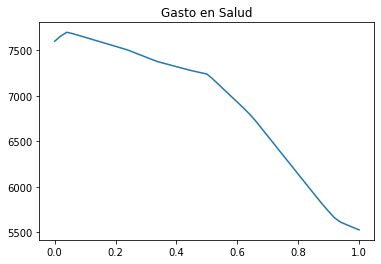

In [30]:
pred_gasto_salud = []
x = np.linspace(0,1.0,51)
for i in x:
    X_prediction = pd.DataFrame()
    X_prediction['Area'] = data_prediction['Area']
    X_prediction['poblacion'] = data_prediction['poblacion']  
    #X_prediction['Namerica'] = data_prediction['Namerica']
    #X_prediction['Samerica'] = data_prediction['Samerica']
    #X_prediction['Europe'] = data_prediction['Europe']
    #X_prediction['Asia'] = data_prediction['Asia']
    #X_prediction['Oceania'] = data_prediction['Oceania']
    #X_prediction['Africa'] = data_prediction['Africa']
    X_prediction['lat'] = data_prediction['lat']    
    X_prediction['long'] = data_prediction['long']
    X_prediction['Dia_inicio'] = data_prediction['Dia_inicio']
    X_prediction['PIB'] = data_prediction['PIB']
    X_prediction['Gasto_Salud'] = np.asarray([i])#data_prediction['Gasto_Salud']
    X_prediction['Cuarentena'] = data_prediction['Cuarentena']
    X_prediction['Dia'] = data_prediction['Dia']
    for i in range(1,dias_a_usar+1):
        X_prediction[str(i)] = data_prediction[str(i)]
    Y_prediction = pd.DataFrame()
    Y_prediction["dia_a_predecir"] = data_prediction["dia_a_predecir"]
    pred_gasto_salud.append(model.predict(X_prediction)[0])
plt.title("Gasto en Salud")
plt.plot(x,pred_gasto_salud)

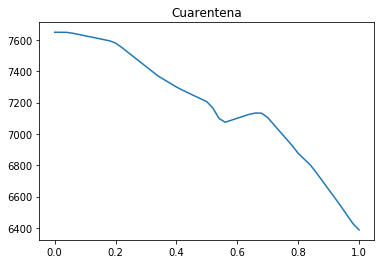

In [31]:
pred_cuarentena = []
x = np.linspace(0,1.0,51)
for i in x:
    X_prediction = pd.DataFrame()
    X_prediction['Area'] = data_prediction['Area']
    X_prediction['poblacion'] = data_prediction['poblacion']  
    #X_prediction['Namerica'] = data_prediction['Namerica']
    #X_prediction['Samerica'] = data_prediction['Samerica']
    #X_prediction['Europe'] = data_prediction['Europe']
    #X_prediction['Asia'] = data_prediction['Asia']
    #X_prediction['Oceania'] = data_prediction['Oceania']
    #X_prediction['Africa'] = data_prediction['Africa']
    X_prediction['lat'] = data_prediction['lat']    
    X_prediction['long'] = data_prediction['long']
    X_prediction['Dia_inicio'] = data_prediction['Dia_inicio']
    X_prediction['PIB'] = data_prediction['PIB']
    X_prediction['Gasto_Salud'] = np.asarray([i])#data_prediction['Gasto_Salud']
    X_prediction['Cuarentena'] = np.asarray([i])#data_prediction['Cuarentena']
    X_prediction['Dia'] = data_prediction['Dia']
    for i in range(1,dias_a_usar+1):
        X_prediction[str(i)] = data_prediction[str(i)]
    Y_prediction = pd.DataFrame()
    Y_prediction["dia_a_predecir"] = data_prediction["dia_a_predecir"]
    pred_cuarentena.append(model.predict(X_prediction)[0])
plt.title("Cuarentena")    
plt.plot(x,pred_cuarentena)

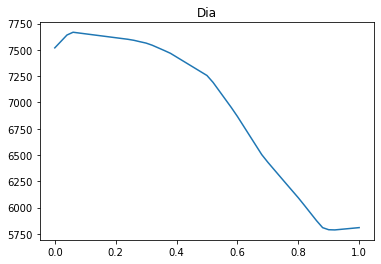

In [32]:
pred_dia = []
x = np.linspace(0,1.0,51)
for i in x:
    X_prediction = pd.DataFrame()
    X_prediction['Area'] = data_prediction['Area']
    X_prediction['poblacion'] = data_prediction['poblacion']  
    #X_prediction['Namerica'] = data_prediction['Namerica']
    #X_prediction['Samerica'] = data_prediction['Samerica']
    #X_prediction['Europe'] = data_prediction['Europe']
    #X_prediction['Asia'] = data_prediction['Asia']
    #X_prediction['Oceania'] = data_prediction['Oceania']
    #X_prediction['Africa'] = data_prediction['Africa']
    X_prediction['lat'] = data_prediction['lat']    
    X_prediction['long'] = data_prediction['long']
    X_prediction['Dia_inicio'] = data_prediction['Dia_inicio']
    X_prediction['PIB'] = data_prediction['PIB']
    X_prediction['Gasto_Salud'] = np.asarray([i])#data_prediction['Gasto_Salud']
    X_prediction['Cuarentena'] = data_prediction['Cuarentena']
    X_prediction['Dia'] = np.asarray([i])#data_prediction['Dia']
    for i in range(1,dias_a_usar+1):
        X_prediction[str(i)] = data_prediction[str(i)]
    Y_prediction = pd.DataFrame()
    Y_prediction["dia_a_predecir"] = data_prediction["dia_a_predecir"]
    pred_dia.append(model.predict(X_prediction)[0])
plt.title("Dia")    
plt.plot(x,pred_dia)

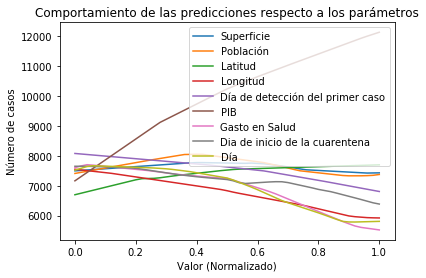

In [33]:
plt.plot(x,pred_area,label="Superficie")
plt.plot(x,pred_poblacion,label="Población")
plt.plot(x,pred_latitud,label="Latitud")
plt.plot(x,pred_longitud,label="Longitud")
plt.plot(x,pred_dia_de_inicio,label="Día de detección del primer caso")
plt.plot(x,pred_pib,label="PIB")
plt.plot(x,pred_gasto_salud,label="Gasto en Salud")
plt.plot(x,pred_cuarentena,label="Dia de inicio de la cuarentena")
plt.plot(x,pred_dia,label="Día")

plt.xlabel("Valor (Normalizado)")
plt.ylabel("Número de casos")
plt.title("Comportamiento de las predicciones respecto a los parámetros")

plt.legend()
#plt.show()
plt.savefig("comp.png", dpi=600)